In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [62]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [63]:
df.drop_duplicates(inplace=True)

In [ ]:
# Feauture Engineering/Processing

In [64]:
# Map species to numerical values
df['species']=df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


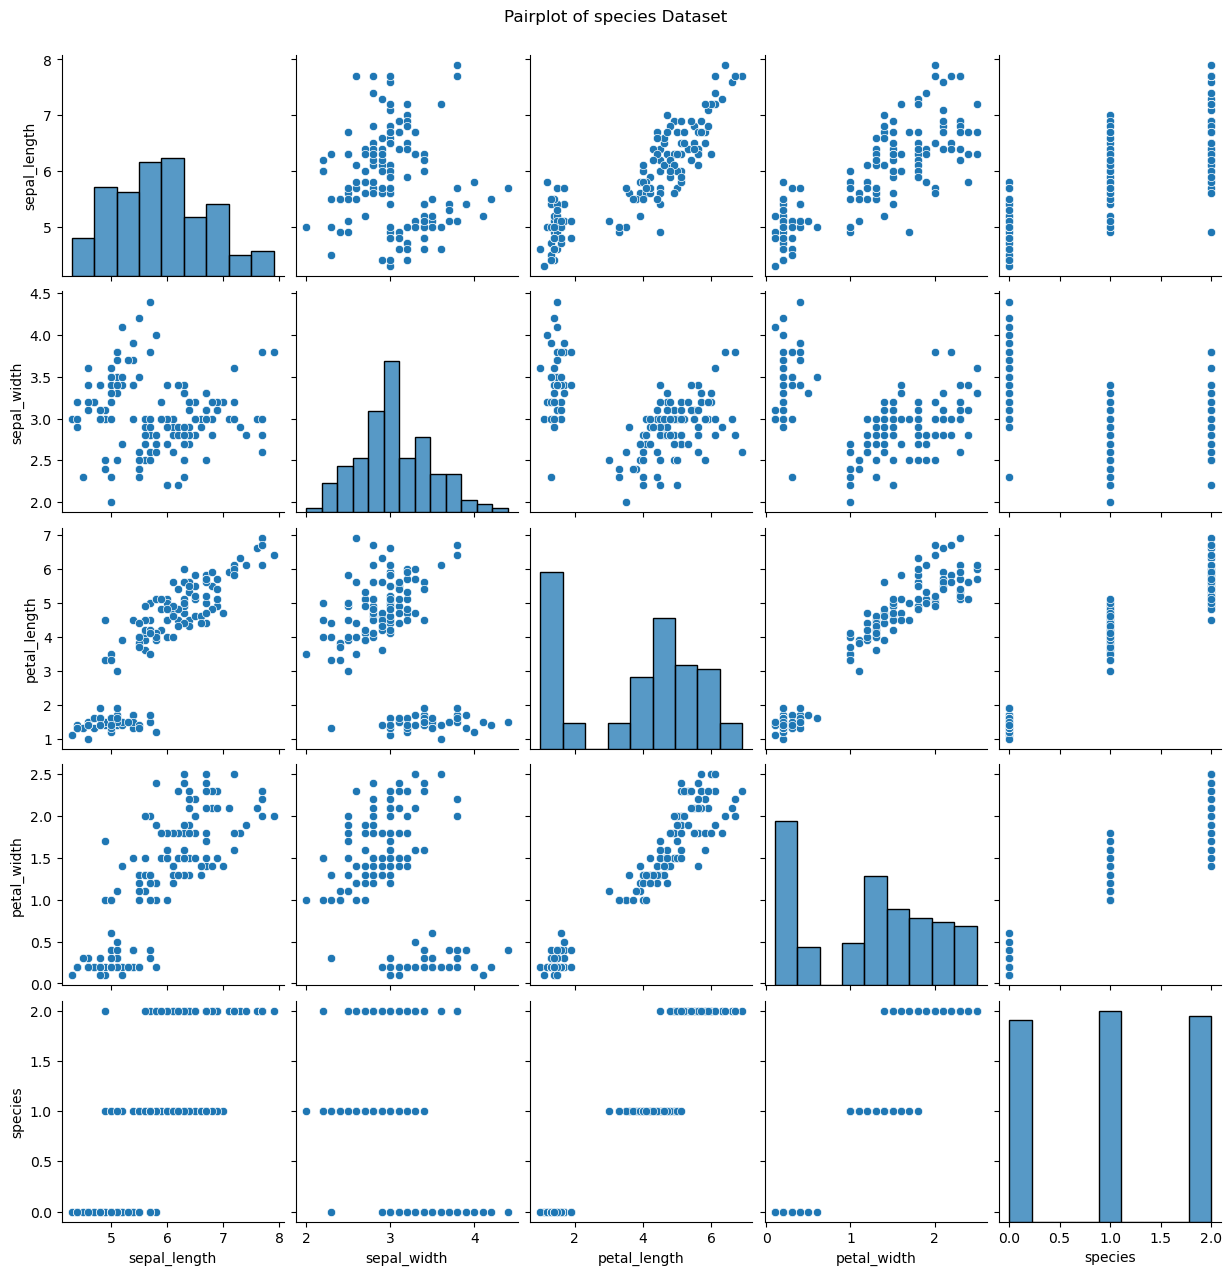

In [66]:
#Pairplot for the dataset
sns.pairplot(df)
plt.suptitle('Pairplot of species Dataset', y=1.02)
plt.show()

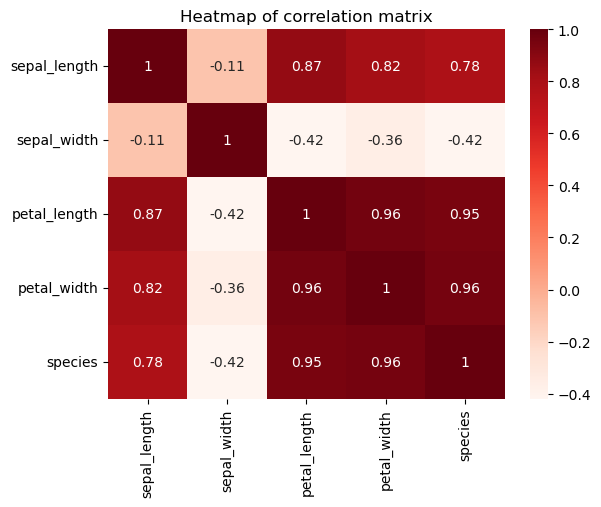

In [67]:
sns.heatmap(corr,annot=True, cmap='Reds')
plt.title('Heatmap of correlation matrix')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
# Features and target variable
X=df.drop('species', axis=1)
y=df['species']

# split the dataset into training and testring sets
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

##Modelling

##Train Logistic Regression

In [40]:
# Import the logisticsRegression class from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data(x_train and y_train)
logistic_model.fit(x_train, y_train)


LogisticRegression()

Validating Logistic Regression

In [69]:
# Predict the target variable for the test data(X_test)
y_pred_logistic = logistic_model.predict(x_test)                          
                           

In [70]:
from sklearn.metrics import accuracy_score
print('Logistics Regression Results')
print('accuracy;', accuracy_score(y_test, y_pred_logistic))

Logistics Regression Results
accuracy; 0.9555555555555556


In [43]:
y_pred_logistic

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int8)

In [49]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [52]:
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']]
y=df['species']


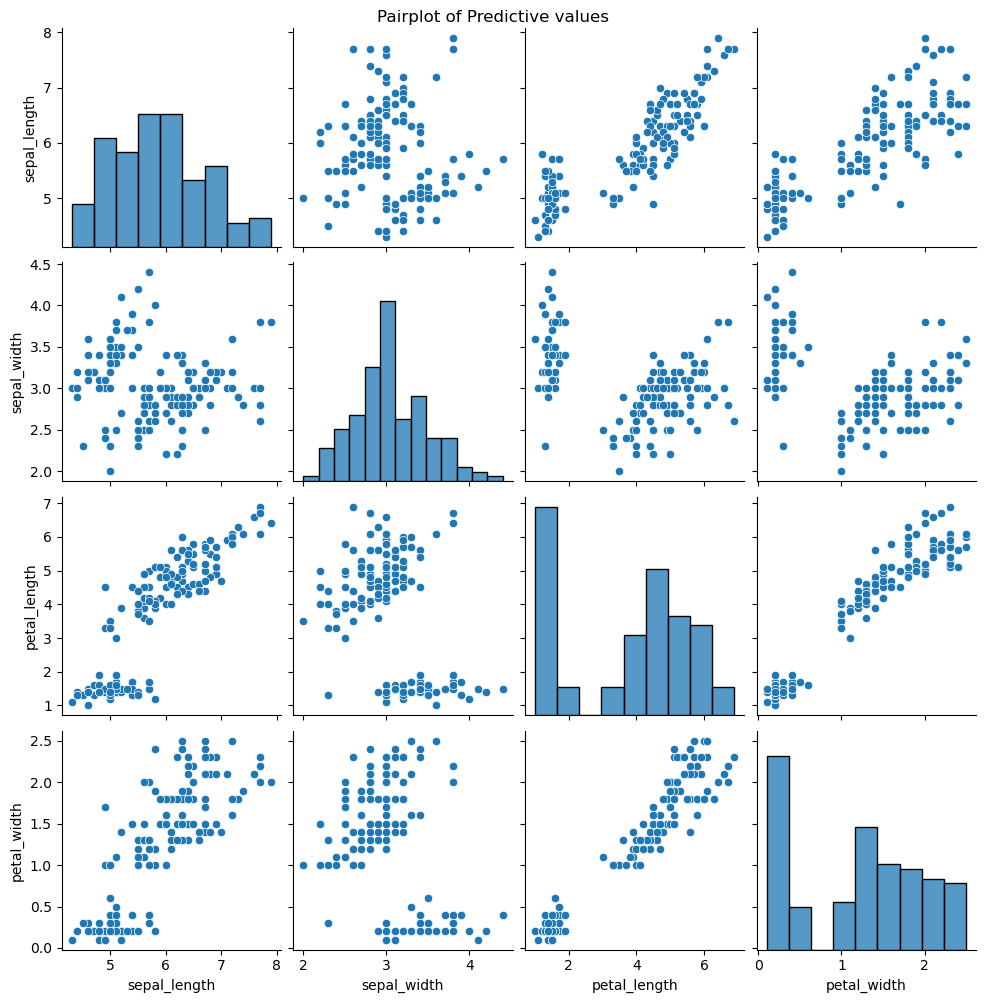

In [21]:
sns.pairplot(df)
plt.suptitle('Pairplot of Predictive values', y=1.0)
plt.show()

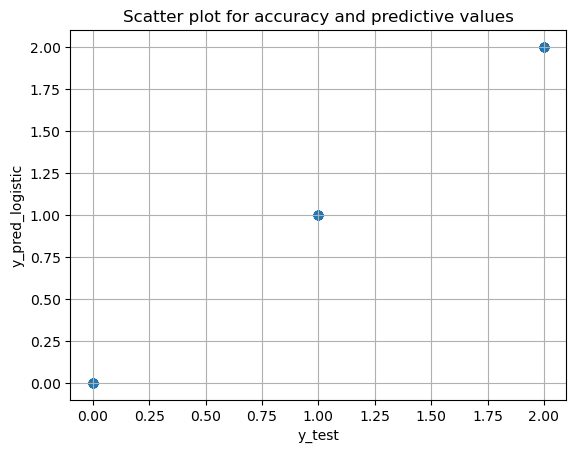

In [44]:
plt.scatter(y_test, y_pred_logistic)
plt.title('Scatter plot for accuracy and predictive values')
plt.xlabel('y_test')
plt.ylabel('y_pred_logistic')
plt.grid(True)
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
# Features and target variable
X=df.drop('species', axis=1)
y=df['species']

# split the dataset into training and testring sets
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(x_train, y_train)

RandomForestClassifier()

##Validating RM

In [82]:
rm_pred = rm.predict(x_test)

In [83]:
rm_accuracy = accuracy_score(y_test, rm_pred)
rm_accuracy

0.9555555555555556

In [84]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=5)
KN.fit(x_train, y_train)



KNeighborsClassifier()

In [85]:
KN_pred = KN.predict(x_test)

In [86]:
KN_accuracy = accuracy_score(y_test, KN_pred)
KN_accuracy

0.9555555555555556

In [99]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [101]:
sv_pred = sv.predict(x_test)

In [102]:
sv_accuracy = accuracy_score(y_test,sv_pred)
sv_accuracy

0.9555555555555556